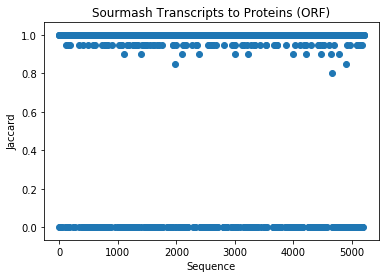

In [18]:
# functions from compute-prot-mh-another-way
# (use for ORF prediction)

dna_to_aa={'TTT':'F','TTC':'F', 'TTA':'L','TTG':'L',
                'TCT':'S','TCC':'S','TCA':'S','TCG':'S',
                'TAT':'Y','TAC':'Y', 'TAA':'*','TAG':'*','TGA':'*',
                'TGT':'C','TGC':'C', 'TGG':'W',
                'CTT':'L','CTC':'L','CTA':'L','CTG':'L',
                'CCT':'P','CCC':'P','CCA':'P','CCG':'P',
                'CAT':'H','CAC':'H', 'CAA':'Q','CAG':'Q',
                'CGT':'R','CGC':'R','CGA':'R','CGG':'R',
                'ATT':'I','ATC':'I','ATA':'I', 'ATG':'M',
                'ACT':'T','ACC':'T','ACA':'T','ACG':'T',
                'AAT':'N','AAC':'N', 'AAA':'K','AAG':'K',
                'AGT':'S','AGC':'S', 'AGA':'R','AGG':'R',
                'GTT':'V','GTC':'V','GTA':'V','GTG':'V',
                'GCT':'A','GCC':'A','GCA':'A','GCG':'A',
                'GAT':'D','GAC':'D', 'GAA':'E','GAG':'E',
                'GGT':'G','GGC':'G','GGA':'G','GGG':'G'}


__complementTranslation = { "A": "T", "C": "G", "G": "C", "T": "A", "N": "N" }
def complement(s):
    """
    Return complement of 's'.
    """
    c = "".join(__complementTranslation[n] for n in s)
    return c

def reverse(s):
    """
    Return reverse of 's'.
    """
    r = "".join(reversed(s))
    return r

def peptides(seq, start):
    for i in range(start, len(seq), 3):
        yield dna_to_aa.get(seq[i:i+3], "X")
        
def translate(seq):
    for i in range(3):
        pep = peptides(seq, i)
        yield "".join(pep)

    revcomp = reverse(complement((seq)))
    for i in range(3):
        pep = peptides(revcomp, i)
        yield "".join(pep)

def kmers(seq, k):
    for start in range(len(seq) - k + 1):
        yield seq[start:start + k]
        
keep_longest=True
#remove=False        
def check_stop_codons(seq, keep_longest=True):
    seq = seq.strip('*') # strip stop codons from beginning or end of sequence
    #print (seq)
    stops = seq.count('*') # count stop codos
    #print (stops)
    #if stops > 0: # truncate? look for largest intervening sequence? remove entirely?
        #if len(split_seqs) > 2: # Could use this to check for too many intervening stop codons (what would be #?)
        #    return ''
    if keep_longest:
        split_seqs = seq.split('*')
        longest = max(split_seqs, key=len)         
        return longest
        #elif remove:
            #return ''
    
def check_length(seq,orfLength):
    if len(seq) >= orfLength:
        return True
    else:
        return False


#with open("Ecoli_transcripts.txt") as f:
 #   for line in f:
  #      print (f)
Trans=[]
#seq=""
with open("Ecoli_trans.txt", 'r') as G:
    for line in G:
        if line[0]!='>':
            line1=line.strip()
            Trans.append(line1)
Proteins=[]
with open("Ecoli_pro.txt",'r') as R:
    for line in R:
        if line[0]!='>':
            line1=line.strip()
            Proteins.append(line1)
#print(Proteins[1])
#print (Trans[0])
        #print (line)
       # line=line.strip()
        #print (line[0])
        #if (line[0]=='>'):
            #check=1
         #   file.append(line)
         #   file.append(seq)
         #   seq=""
        #if (line[0]!='>'):
           # seq+=line
            #check=0
#print (file[1])
        

    
    
#print (Trans) 
    
#Transcript="ATGCGAGTGTTG"
#Transcript="ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGGGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTCTGACGGGACTCGCCGCCGCCCAGCCGGGATTCCCGCTGGCGCAATTGAAAACTTTCGTCGACCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTAGGGCAGTGCCCGGATAGCATTAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACCGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACTGTCGATATTGCAGAGTCCACCCGCCGTATTGCGGCAAGTCGTATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTACTTGGACGCAACGGTTCCGACTACTCCGCGGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAATCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCTCCAGGTACGCTCATTGGTGCCAGTCGTGATGAAGACGAATTACCGGTCAAGGGCATTTCCAATCTGAATAATATGGCAATGTTCAGCGTTTCCGGCCCGGGGATGAAAGGAATGGTCGGCATGGCGGCGCGCGTCTTTGCTGCAATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAATACAGTATCAGTTTCTGCGTTCCGCAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTACCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCGGTGACGGAACGGCTGGCCATTATCTCGGTGGTAGGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCGCTGGCCCGCGCCAATATCAACATTGTCGCTATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGACCACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGCGTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGTTGAAGAATAAACATATCGACTTACGTGTCTGCGGTGTTGCTAACTCGAAGGCTCTGCTCACCAATGTGCATGGCCTAAATCTGGAAAACTGGCAGGAAGAACTGGCGCAAGCCAAAGAGCCGTTTAATCTCGGGCGCTTAATTCGCCTCGTGAAAGAATATCATCTGCTGAACCCGGTCATTGTTGACTGCACCTCCAGCCAGGCAGTGGCGGATCAATATGCCGACTTCCTGCGCGAAGGTTTCCACGTTGTCACGCCGAACAAAAAGGCCAACACCTCGTCGATGGATTACTACCATCTGTTGCGTCATGCGGCTGAAAAATCGCGGCGTAAATTCCTCTATGACACCAACGTTGGGGCTGGATTACCGGTTATTGAGAACCTGCAAAATCTGCTCAATGCTGGTGATGAATTGATGAAGTTCTCCGGCATTCTTTCAGGTTCGCTTTCTTATATCTTCGGCAAGTTAGACGAAGGCATGAGTTTCTCCGAGGCGACTACGCTGGCGCGGGAAATGGGTTATACCGAACCGGATCCGCGAGATGATCTTTCTGGTATGGATGTAGCGCGTAAACTATTAATTCTCGCTCGTGAAACGGGACGTGAACTGGAGCTGGCGGATATTGAAATTGAACCTGTGCTGCCCGCAGAGTTTAACGCTGAGGGTGATGTTGCCGCTTTTATGGCGAATCTGTCACAGCTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTTTATAGCCACTATTATCAGCCGCTGCCGTTGGTGCTGCGCGGATATGGTGCGGGCAATGACGTTACCGCTGCCGGTGTCTTTGCCGATCTGCTACGTACCCTCTCATGGAAGTTAGGAGTCTGA"
ORF_long=[]
for i in Trans:
    peps = translate(i) 
    longest_list=[]
    for p in peps:
        #print (p)
        longest=check_stop_codons(p)
        longest_list.append(longest)
    ORF=max(longest_list, key=len)
    ORF_long.append(ORF)

#print (ORF_long)
#print(len(Proteins))
#print(len(Trans))
import sourmash_lib
Results=open("Results_ORF_to_proteins.txt","w")
for q in range(0,5200):
    protein=Proteins[q]
    trancript=ORF_long[q]
    #print (protein)
    #print (trancript)
    E1 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1.add_protein(protein)
    E2 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E2.add_protein(trancript)
    Jaccard=E1.jaccard(E2)
    #print (Jaccard)
    Results.write(str(Jaccard)+"\n")
Results.close()

with open("Results_ORF_to_proteins.txt") as f:
    contents = f.readlines()
    #print(contents111)
    #print (content)
    contents = [x.strip() for x in contents]
    contents= [float(x) for x in contents]
    sequence=[]
    for i in range(1,len(ORF_long)+1):
        #print (i)
        sequence.append(i)
    #print (len(contents11))
    #print (len(contents111))

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(sequence,contents)
plt.ylabel('Jaccard')
plt.xlabel('Sequence')
plt.title("Sourmash Transcripts to Proteins (ORF)")
plt.show()







MRITIILVAPARAENIGAAARAMKTMGFSELRIVDSQAHLEPATRWVAHGSGDIIDNIKVFPTLAESLHDVDFTVATTARSRAKYHYYATPVELVPLLEEKSSWMSHAALVFGREDSGLTNEELALADVLTGVPMVADYPSLNLGQAVMVYCYQLAILIQQPTKSDTTADQHQLQALRERAMALLTTLAVADDIKLVDWLQQRLGLLEQRDTAMLHRLLHDIEKNITK


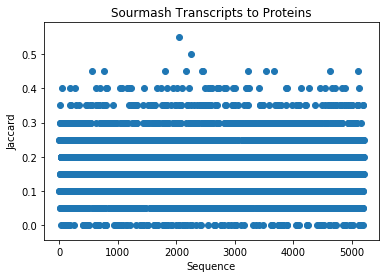

In [25]:
Trans_noORF=[]
with open("Ecoli_trans.txt", 'r') as G:
    for line in G:
        if line[0]!='>':
            line1=line.strip()
            Trans_noORF.append(line1)
Proteins_noORF=[]
with open("Ecoli_pro.txt",'r') as R:
    for line in R:
        if line[0]!='>':
            line1=line.strip()
            Proteins_noORF.append(line1)
#print (Proteins_noORF[-1])
#print (len(Proteins_noORF))

import sourmash_lib
Results1=open("Results_transcripts_noORF_proteins.txt","w")
for q in range(0,5200):
    protein1=Proteins_noORF[q]
    protein2=Trans_noORF[q]
    #print (protein)
    #print (trancript)
    E1 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1.add_protein(protein)
    E2 = sourmash_lib.MinHash(n=20, ksize=21,is_protein=True)
    E2.add_protein()
    Jaccard=round(E1.jaccard(E2),2)
    #print (Jaccard)
    #print (Jaccard)
    Results1.write(str(Jaccard)+"\n")
Results1.close()

with open("Results_transcripts_noORF_proteins.txt") as f:
    contents1 = f.readlines()
    #print(contents111)
    #print (content)
    contents1 = [x.strip() for x in contents1]
    contents1= [float(x) for x in contents1]
    #print (contents1)
    sequence1=[]
    for i in range(1,len(Trans_noORF)+1):
        #print (i)
        sequence1.append(i)
    #print (len(contents11))
    #print (len(contents111))

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(sequence,contents1)
plt.ylabel('Jaccard')
plt.xlabel('Sequence')
plt.title("Sourmash Transcripts to Proteins")
plt.show()